# Internship

## Predicting the market price of a house 


### HOUSE SALES IN KING COUNTY, USA


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.






|Variable|	Description|
|---|---|
|Variable|	Description|
|id	|A notation for a house|
|date|Date house was sold|
|price|	price is prediction target|
|bedrooms|	Number of bedrooms|
|bathrooms|	Number of bathrooms|
|sqft_living|	Square footage of the home|
|sqft_lot|	Square footage of the lot|
|floors|	Total floors (levels) in house|
|waterfront|	House which has a view to a waterfront|
|view|	Has been viewed|
|condition|	How good the condition is overall|
|grade|	overall grade given to the housing unit, based on King County grading system|
|sqft|above	Square footage of house apart from basement|
|sqft_basement|	Square footage of the basement|
|yr_built|	Built Year|
|yr_renovated|	Year when house was renovated|
|zipcode|	Zip code|
|lat|	Latitude coordinate|
|long|	Longitude coordinate|
|sqft_living15|	Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area|
|sqft_lot15|	LotSize area in 2015(implies-- some renovations)|


<h1>DATA ACQUISITION</h1>

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
from scipy import stats
from scipy.stats import norm

In [6]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [7]:
df=pd.read_csv(path)

In [8]:
df.to_csv("kc_house_data_NaN.csv")

In [9]:
df.head(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [10]:
df.tail(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,21603,7852140040,20140825T000000,507250.0,3.0,2.50,2270,5536,2.0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,21604,9834201367,20150126T000000,429000.0,3.0,2.00,1490,1126,3.0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,21605,3448900210,20141014T000000,610685.0,4.0,2.50,2520,6023,2.0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,21606,7936000429,20150326T000000,1007500.0,4.0,3.50,3510,7200,2.0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,21607,2997800021,20150219T000000,475000.0,3.0,2.50,1310,1294,2.0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,21612,1523300157,20141015T000000,325000.0,2.0,0.75,1020,1076,2.0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [11]:
df.shape

(21613, 22)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [13]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0          id             date     price  bedrooms  bathrooms  \
0               0  7129300520  20141013T000000  221900.0       3.0       1.00   
1               1  6414100192  20141209T000000  538000.0       3.0       2.25   
2               2  5631500400  20150225T000000  180000.0       2.0       1.00   
3               3  2487200875  20141209T000000  604000.0       4.0       3.00   
4               4  1954400510  20150218T000000  510000.0       3.0       2.00   
...           ...         ...              ...       ...       ...        ...   
21608       21608   263000018  20140521T000000  360000.0       3.0       2.50   
21609       21609  6600060120  20150223T000000  400000.0       4.0       2.50   
21610       21610  1523300141  20140623T000000  402101.0       2.0       0.75   
21611       21611   291310100  20150116T000000  400000.0       3.0       2.50   
21612       21612  1523300157  20141015T000000  325000.0       2.0       0.

In [14]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
df.describe(include='all')

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,21613,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10806.00000,4.580302e+09,NaN,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,NaN,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,NaN,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [16]:
df[['price','bedrooms','bathrooms']].describe()

,price,bedrooms,bathrooms
count,2.161300e+04,21600.000000,21603.000000
mean,5.400881e+05,3.372870,2.115736
std,3.671272e+05,0.926657,0.768996
min,7.500000e+04,1.000000,0.500000
25%,3.219500e+05,3.000000,1.750000
50%,4.500000e+05,3.000000,2.250000
75%,6.450000e+05,4.000000,2.500000
max,7.700000e+06,33.000000,8.000000


<h2>DATA WRANGLING</h2>

In [17]:
missing_data = df.isnull()

In [18]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Unnamed: 0
False    21613
Name: Unnamed: 0, dtype: int64

id
False    21613
Name: id, dtype: int64

date
False    21613
Name: date, dtype: int64

price
False    21613
Name: price, dtype: int64

bedrooms
False    21600
True        13
Name: bedrooms, dtype: int64

bathrooms
False    21603
True        10
Name: bathrooms, dtype: int64

sqft_living
False    21613
Name: sqft_living, dtype: int64

sqft_lot
False    21613
Name: sqft_lot, dtype: int64

floors
False    21613
Name: floors, dtype: int64

waterfront
False    21613
Name: waterfront, dtype: int64

view
False    21613
Name: view, dtype: int64

condition
False    21613
Name: condition, dtype: int64

grade
False    21613
Name: grade, dtype: int64

sqft_above
False    21613
Name: sqft_above, dtype: int64

sqft_basement
False    21613
Name: sqft_basement, dtype: int64

yr_built
False    21613
Name: yr_built, dtype: int64

yr_renovated
False    21613
Name: yr_renovated, dtype: int64

zipcode
False    21613
Name: zipcode, dtype: int64

lat


<p>so there's missing data in bedroom n bathroom</p>

In [19]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [20]:
df.rename(columns={"Unnamed: 0":"S.No"},inplace=True)

In [21]:
df.columns

Index(['S.No', 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [22]:
df["price"].mean()

540088.1417665294

<p><b> Analyzing bedrooms and bathrooms</b></p>

In [23]:
df[['bedrooms']].describe()

,bedrooms
count,21600.000000
mean,3.372870
std,0.926657
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,33.000000


In [24]:
df['bedrooms'].value_counts()

3.0     9824
4.0     6882
2.0     2760
5.0     1601
6.0      272
1.0      199
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: bedrooms, dtype: int64

<p>as we can see over here the mean and most frequently appearing number of bedrooms is 3 so we will replace the missing data in bedrooms columns to 3</p>

In [25]:
df[["bathrooms"]].describe()

,bathrooms
count,21603.000000
mean,2.115736
std,0.768996
min,0.500000
25%,1.750000
50%,2.250000
75%,2.500000
max,8.000000


In [26]:
df[["bathrooms"]].value_counts()

bathrooms
2.50         5380
1.00         3852
1.75         3048
2.25         2047
2.00         1930
1.50         1446
2.75         1185
3.00          753
3.50          731
3.25          589
3.75          155
4.00          136
4.50          100
4.25           79
0.75           72
4.75           23
5.00           21
5.25           13
5.50           10
1.25            9
6.00            6
0.50            4
5.75            4
6.25            2
6.50            2
6.75            2
8.00            2
7.50            1
7.75            1
dtype: int64

In [27]:
mean=df['bathrooms'].mean()
print(mean)

2.1157362403369904


<p> in the bathrooms case, the most frequently appearing number of bathrooms is 2.5 but the mean is 2.11 but range of the number of the bathroom's differing a lot, we replace the missing values in the bathrooms column to the mean which is 2.11 which is then rounded off to 2</p>

In [28]:
df1=df.replace('?',np.nan)

In [29]:
df['bathrooms'].replace(np.nan,mean,inplace=True)

In [30]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Unnamed: 0
False    21613
Name: Unnamed: 0, dtype: int64

id
False    21613
Name: id, dtype: int64

date
False    21613
Name: date, dtype: int64

price
False    21613
Name: price, dtype: int64

bedrooms
False    21600
True        13
Name: bedrooms, dtype: int64

bathrooms
False    21603
True        10
Name: bathrooms, dtype: int64

sqft_living
False    21613
Name: sqft_living, dtype: int64

sqft_lot
False    21613
Name: sqft_lot, dtype: int64

floors
False    21613
Name: floors, dtype: int64

waterfront
False    21613
Name: waterfront, dtype: int64

view
False    21613
Name: view, dtype: int64

condition
False    21613
Name: condition, dtype: int64

grade
False    21613
Name: grade, dtype: int64

sqft_above
False    21613
Name: sqft_above, dtype: int64

sqft_basement
False    21613
Name: sqft_basement, dtype: int64

yr_built
False    21613
Name: yr_built, dtype: int64

yr_renovated
False    21613
Name: yr_renovated, dtype: int64

zipcode
False    21613
Name: zipcode, dtype: int64

lat


<p> here we have replaced the missing data in bedroom column with its most frequently appearing value and replaced the missing data in the bathroom column with its mean as this is the most suitable solution in this case instead of dropping the whole row </p>

#### DATA NORMALIZATION

In [31]:
df.describe()

,S.No,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768818,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [32]:
df["sqft_living"]=(df["sqft_living"]-df["sqft_living"].min())/(df["sqft_living"].max()-df["sqft_living"].min())

In [33]:
df["sqft_lot"]=(df["sqft_lot"]-df["sqft_lot"].min())/(df["sqft_lot"].max()-df["sqft_lot"].min())

In [34]:
df.describe()

,S.No,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,0.135087,0.008836,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768818,0.069316,0.025091,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,0.085811,0.002738,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,0.122264,0.004300,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,0.170566,0.006159,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,1.000000,1.000000,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<p> we have done data normalization on 2 columns over here as their values were differing a lot and so as to not effect the computation , correlation, and the final prediction</p>

<p><b>binning</b></p>

In [35]:
bins=np.linspace(min(df["price"]),max(df["price"]),4)

In [36]:
group_names=["low","medium","high"]

In [37]:
df['price_binned']=pd.cut(df["price"],bins,labels=group_names,include_lowest=True)

### EXPLORATORY DATA ANALYSIS

In [38]:
df.describe()

,S.No,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,0.135087,0.008836,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768818,0.069316,0.025091,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,0.085811,0.002738,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,0.122264,0.004300,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,0.170566,0.006159,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,1.000000,1.000000,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [39]:
df["bedrooms"].value_counts().to_frame()

,bedrooms
3.0,9824
4.0,6882
2.0,2760
5.0,1601
6.0,272
1.0,199
7.0,38
8.0,13
9.0,6
10.0,3


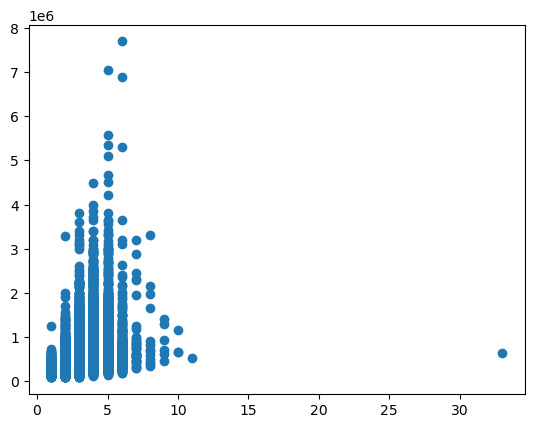

In [40]:
y=df["price"]
x=df["bedrooms"]
plt.scatter(x,y)

In [41]:
df["bathrooms"].value_counts().to_frame()

,bathrooms
2.500000,5380
1.000000,3852
1.750000,3048
2.250000,2047
2.000000,1930
1.500000,1446
2.750000,1185
3.000000,753
3.500000,731
3.250000,589


In [42]:
df["floors"].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


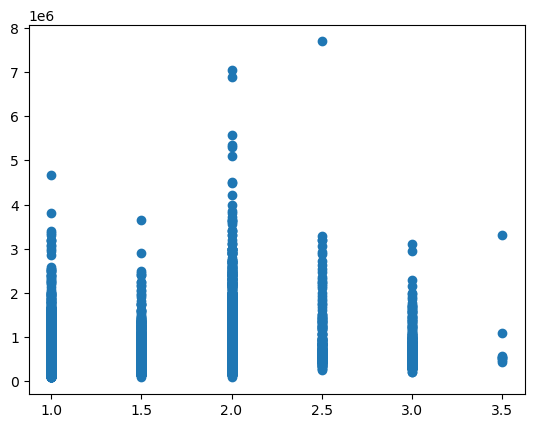

In [43]:
y=df["price"]
x=df["floors"]
plt.scatter(x,y)

<Axes: xlabel='floors', ylabel='price'>

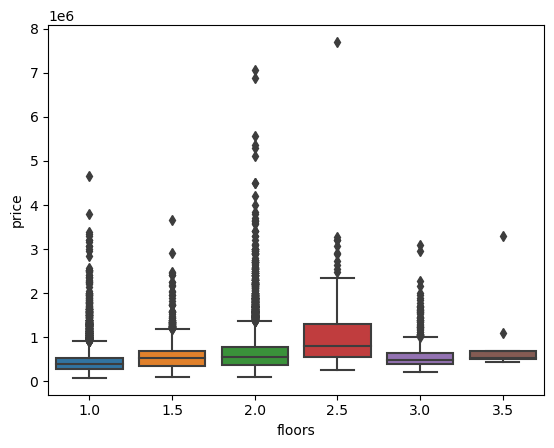

In [44]:
sns.boxplot(x="floors",y="price",data=df)

In [45]:
df["waterfront"].value_counts().to_frame()

,waterfront
0,21450
1,163


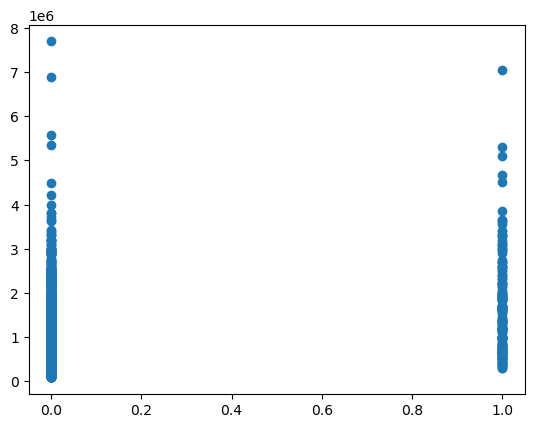

In [46]:
y=df["price"]
x=df["waterfront"]
plt.scatter(x,y)

<Axes: xlabel='waterfront', ylabel='price'>

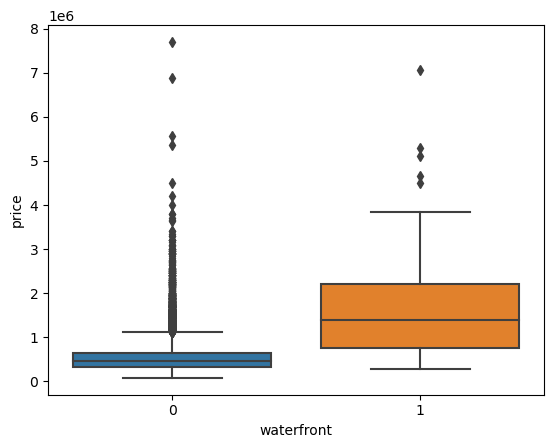

In [47]:
sns.boxplot(x="waterfront",y="price",data=df)

In [48]:
df["view"].value_counts().to_frame()

,view
0,19489
2,963
3,510
1,332
4,319


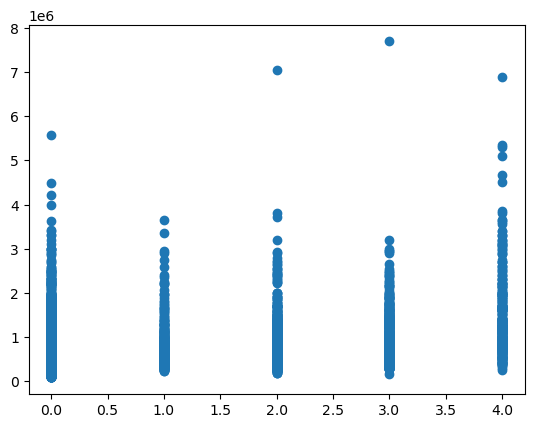

In [49]:
y=df["price"]
x=df["view"]
plt.scatter(x,y)

<Axes: xlabel='view', ylabel='price'>

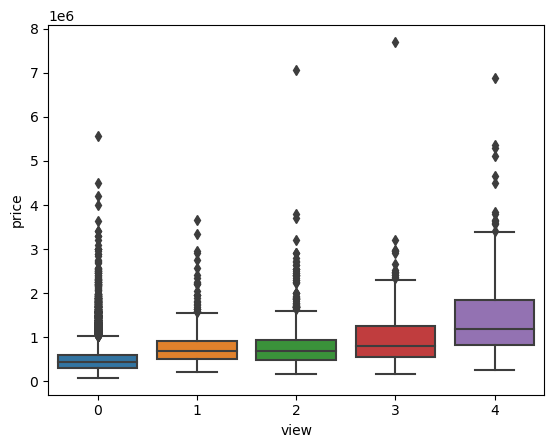

In [50]:
sns.boxplot(x="view",y="price",data=df)

In [51]:
df["condition"].value_counts().to_frame()

,condition
3,14031
4,5679
5,1701
2,172
1,30


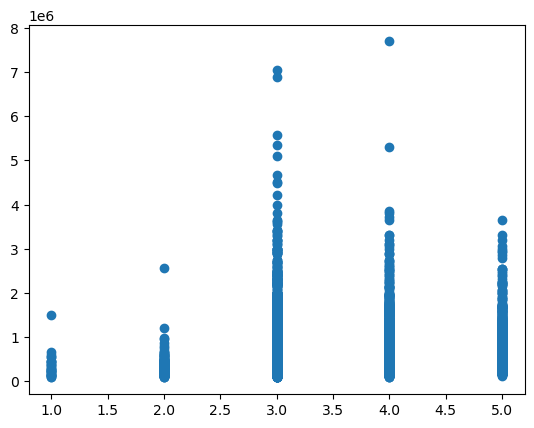

In [52]:
y=df["price"]
x=df["condition"]
plt.scatter(x,y)

<Axes: xlabel='condition', ylabel='price'>

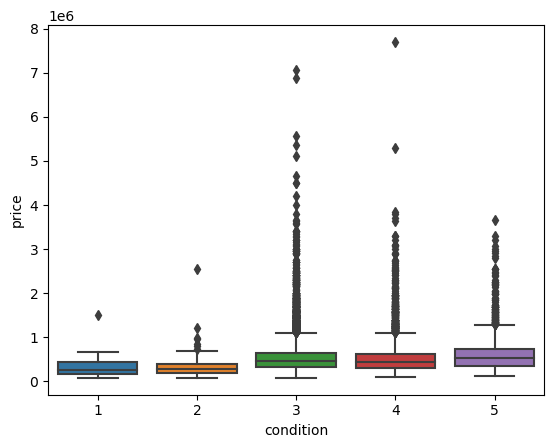

In [53]:
sns.boxplot(x="condition",y="price",data=df)

In [54]:
df_test=df[["bedrooms","bathrooms","price"]]

In [55]:
df_grp=df_test.groupby(["bedrooms","bathrooms"],as_index=False).mean()
df_grp

,bedrooms,bathrooms,price
0,1.0,0.50,2.550000e+05
1,1.0,0.75,2.510537e+05
2,1.0,1.00,3.166300e+05
3,1.0,1.25,8.817500e+05
4,1.0,1.50,3.257458e+05
...,...,...,...
134,10.0,2.00,6.500000e+05
135,10.0,3.00,6.600000e+05
136,10.0,5.25,1.148000e+06
137,11.0,3.00,5.200000e+05


In [56]:
df_pivot=df_grp.pivot(index='bedrooms',columns='bathrooms')
df_pivot=df_pivot.fillna(0)
df_pivot

price                                               \
bathrooms  0.500000       0.750000       1.000000       1.250000   
bedrooms                                                           
1.0        255000.0  251053.703704  316629.956522  881750.000000   
2.0        191000.0  327513.500000  348072.801027  468983.333333   
3.0             0.0  311512.562500  336184.648876  605125.000000   
4.0        312500.0  331250.000000  391165.301538       0.000000   
5.0             0.0       0.000000  493234.465116       0.000000   
6.0             0.0       0.000000  590833.333333       0.000000   
7.0             0.0       0.000000  291000.000000       0.000000   
8.0             0.0       0.000000       0.000000       0.000000   
9.0             0.0       0.000000       0.000000       0.000000   
10.0            0.0       0.000000       0.000000       0.000000   
11.0            0.0       0.000000       0.000000       0.000000   
33.0            0.0       0.000000       0.000000       0.000000   

                                                                       \
bathrooms       1.500000       1.750000       2.000000       2.115736   
bedrooms                                                                
1.0        325745.833333  366050.000000  297166.666667  279666.666667   
2.0        410121.438776  471248.667763  448356.226852       0.000000   
3.0        398189.268999  435506.234225  447470.544847       0.000000   
4.0        442373.874016  490005.653686  475166.535238       0.000000   
5.0        454249.791667  491080.485075  499585.909091       0.000000   
6.0        326066.666667  540250.000000  461800.000000       0.000000   
7.0        442500.000000       0.000000       0.000000       0.000000   
8.0             0.000000       0.000000       0.000000       0.000000   
9.0             0.000000       0.000000       0.000000       0.000000   
10.0            0.000000       0.000000  650000.000000       0.000000   
11.0            0.000000       0.000000       0.000000       0.000000   
33.0            0.000000  640000.000000       0.000000       0.000000   

                                         ...                                   \
bathrooms       2.250000       2.500000  ...   5.250000   5.500000   5.750000   
bedrooms                                 ...                                    
1.0        436225.000000  489500.000000  ...        0.0        0.0        0.0   
2.0        517654.779661  540896.842640  ...        0.0        0.0        0.0   
3.0        485457.331793  517432.391175  ...        0.0        0.0        0.0   
4.0        585905.911142  581818.308553  ...  1623000.0  2355000.0  1940000.0   
5.0        658862.655172  612480.285714  ...  3035450.0  3052000.0  3745000.0   
6.0        706600.000000  595005.862069  ...   739500.0        0.0        0.0   
7.0        636333.333333  439500.000000  ...        0.0  1240000.0   540000.0   
8.0             0.000000  700000.000000  ...        0.0        0.0        0.0   
9.0             0.000000       0.000000  ...        0.0        0.0        0.0   
10.0            0.000000       0.000000  ...  1148000.0        0.0        0.0   
11.0            0.000000       0.000000  ...        0.0        0.0        0.0   
33.0            0.000000       0.000000  ...        0.0        0.0        0.0   

                                                                            \
bathrooms   6.000000   6.250000   6.500000   6.750000  7.500000   7.750000   
bedrooms                                                                     
1.0              0.0        0.0        0.0        0.0       0.0        0.0   
2.0              0.0        0.0        0.0        0.0       0.0        0.0   
3.0              0.0        0.0        0.0        0.0       0.0        0.0   
4.0              0.0        0.0        0.0        0.0       0.0        0.0   
5.0        2557750.0  3094000.0  2238890.0  4668000.0       0.0        0.0   
6.0        5300000.0        0.0  1180000.0        0.0    

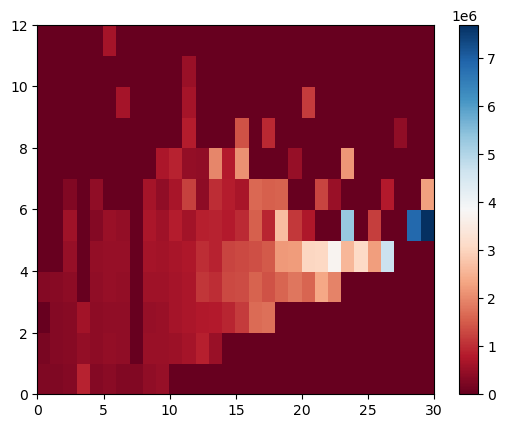

In [57]:
plt.pcolor(df_pivot,cmap='RdBu')
plt.colorbar()
plt.show()

<p><b>CORRELATION</b></p>

In [58]:
df.describe()

,S.No,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,0.135087,0.008836,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768818,0.069316,0.025091,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,0.085811,0.002738,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,0.122264,0.004300,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,0.170566,0.006159,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,1.000000,1.000000,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


(0.0, 8081250.0)

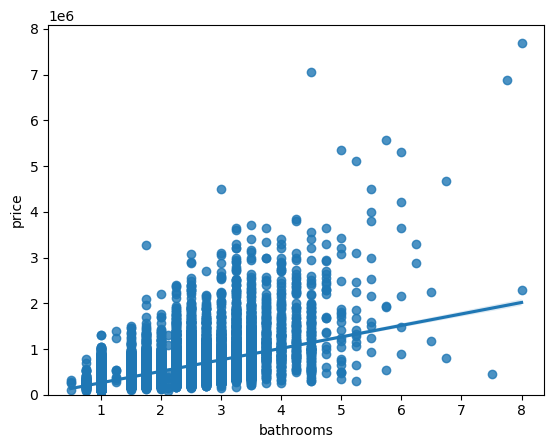

In [59]:
sns.regplot(x="bathrooms",y="price",data=df)
plt.ylim(0,)

In [60]:
pearson_coef,p_value=stats.pearsonr(df['bathrooms'],df["price"])
pearson_coef

0.5257375111242718

In [61]:
p_value

0.0

<p>weak correlation as the low and the hight values have simliar outcomes and p_value is greater than 0.1 hence making the bathrooms feature not suitable for predicting the price</p>

(0.0, 8081250.0)

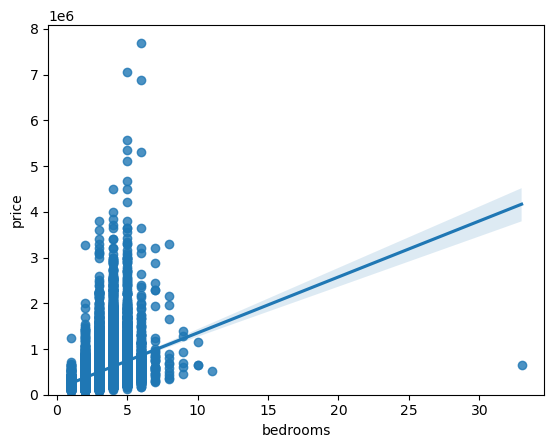

In [62]:
sns.regplot(x="bedrooms",y="price",data=df)
plt.ylim(0,)

(0.0, 8084074.085430305)

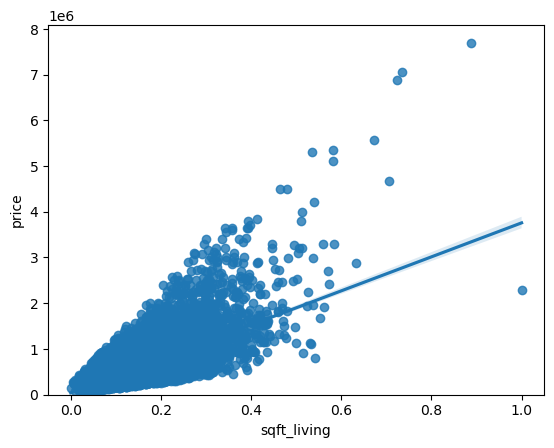

In [63]:
sns.regplot(x="sqft_living",y="price",data=df)
plt.ylim(0,)

In [64]:
pearson_coef1,p_value1=stats.pearsonr(df['sqft_living'],df["price"])
pearson_coef1

0.7020350546118002

<p>strong positive correlation</p>

(0.0, 8081250.0)

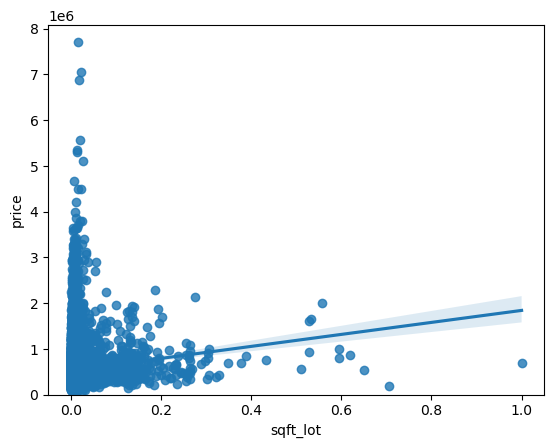

In [65]:
sns.regplot(x="sqft_lot",y="price",data=df)
plt.ylim(0,)

very weak correlation

In [66]:
pearson_coef2,p_value2=stats.pearsonr(df['sqft_lot'],df["price"])
pearson_coef2

0.08966086058710013

In [67]:
df.corr()['price'].sort_values()

C:\Users\Samhith\AppData\Local\Temp\ipykernel_27440\321850276.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053203
id              -0.016762
long             0.021626
S.No             0.027372
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308890
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<p>as we can see over here these are the correlation values which effect the price with the highest being sqft_living</p>

C:\Users\Samhith\AppData\Local\Temp\ipykernel_27440\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

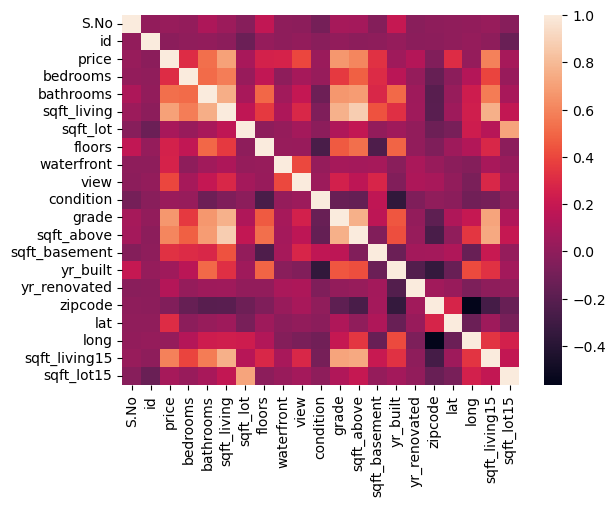

In [68]:
sns.heatmap(df.corr())

this is the overall correlation of the dataframe


### MODEL DEVELOPMENT


In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lm=LinearRegression()

In [118]:
X = df[['sqft_living']]
Y = df['price']
lm.fit(X,Y)

LinearRegression()

In [119]:
lm.intercept_

37800.091595786274

In [120]:
lm.coef_

array([3718262.27464119])

In [121]:
lm.score(X,Y)

0.4928532179037931

<p>This is the value of R^2</p>

In [126]:
features=["floors","waterfront","lat","sqft_basement","view","sqft_living15","sqft_above","grade","sqft_living"]

In [127]:
X=df[features]
Y=df["price"]
lm1=LinearRegression()
lm1.fit(X,Y)

LinearRegression()

In [130]:
lm1.intercept_

-32792243.87315929

In [131]:
lm1.coef_

array([-3.19164212e+04,  6.13478252e+05,  6.79882729e+05,  1.69720973e+02,
        6.95593332e+04,  5.10657167e+00,  1.74214142e+02,  8.52383721e+04,
        2.59573671e-02])

In [129]:
lm1.score(X,Y)

0.6548656547570819

In [152]:
from sklearn.metrics import r2_score

In [133]:
from sklearn.preprocessing import PolynomialFeatures

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
from sklearn.pipeline import Pipeline

In [138]:
input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('mode',LinearRegression())]

In [139]:
pipe=Pipeline(input)

In [141]:
pipe.fit(df[["floors","waterfront","lat","sqft_basement","view","sqft_living15","sqft_above","grade","sqft_living"]],y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('mode', LinearRegression())])

In [143]:
yhat=pipe.predict(X[["floors","waterfront","lat","sqft_basement","view","sqft_living15","sqft_above","grade","sqft_living"]])

In [144]:
yhat

array([353510.5, 567796.5, 460348.5, ..., 383080.5, 464962. , 383031.5])

In [148]:
pipeline=Pipeline(input)

In [149]:
pipeline.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('mode', LinearRegression())])

In [150]:
y_pred=pipeline.predict(X)

In [153]:
r2=r2_score(y,y_pred)

In [154]:
r2

0.7477250046334052

C:\Users\Samhith\AppData\Local\Temp\ipykernel_27440\155085051.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\Samhith\AppData\Local\Temp\ipykernel_27440\155085051.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

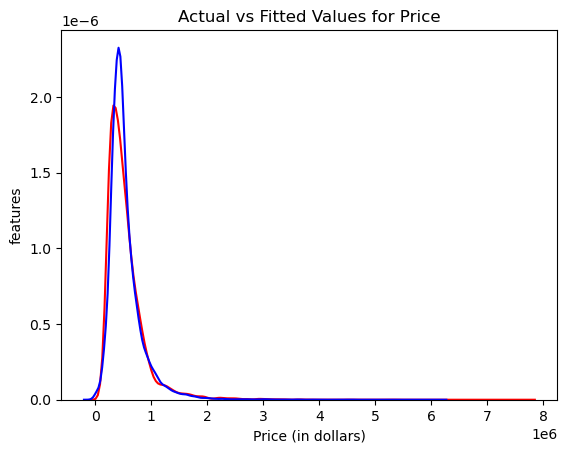

In [193]:
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('features')
plt.show()

<p> now, this is a pretty accurate prediction which can be helped with further improvement of course</p>
